<a href="https://colab.research.google.com/github/imswabhab/Projects-ML/blob/master/AllStates_claims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing relevant Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting drive to importing the dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#reading csv
train = pd.read_csv('/content/drive/My Drive/Untitled folder (2)/train.csv')
test= pd.read_csv('/content/drive/My Drive/Untitled folder (2)/test.csv')

In [0]:
#Print all rows and columns.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [6]:
train.shape

(188318, 132)

In [7]:
test.shape

(125546, 131)

In [8]:
#cheecking for null values
pd.isnull(train).values.any()

False

In [9]:
train.info()
#15 continous values and 116 categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [0]:
#separating categorical values into cat_feature and continous values into cont_feature
cat_feature = list(train.select_dtypes(include=['object']).columns)
cont_feature = [cont for cont in list(train.select_dtypes(include=['float64','int64']).columns)if cont not in ['loss','id']]
id_col = list(train.select_dtypes(include=['int64']).columns)

In [31]:
#checking categorical values
cat_uniques = []
for i in cat_feature:
    cat_uniques.append(len(train[i].unique()))
uniqueValue = pd.DataFrame.from_items([('cat_name',cat_feature),('uniqueValue',cat_uniques)])
uniqueValue.head()

,cat_name,uniqueValue
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2


Text(0.5, 1.0, 'Zoom in top 10 categories')

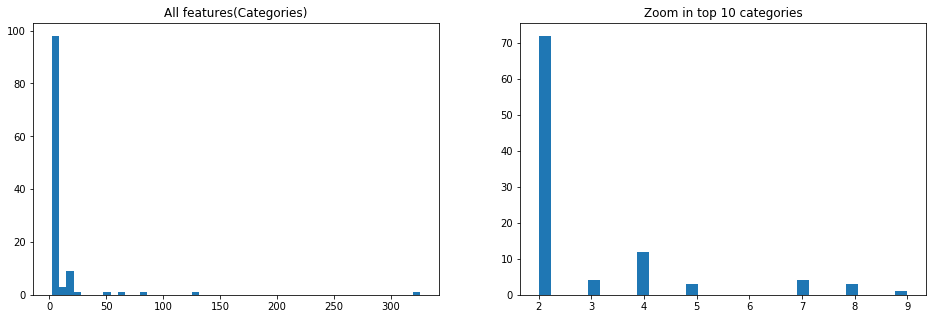

In [12]:
#checking all unique features
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(uniqueValue.uniqueValue,bins=50)
ax2.hist(uniqueValue[uniqueValue.uniqueValue<=10].uniqueValue,bins=30)
ax1.set_title('All features(Categories)')
ax2.set_title('Zoom in top 10 categories')


Text(0, 0.5, 'loss')

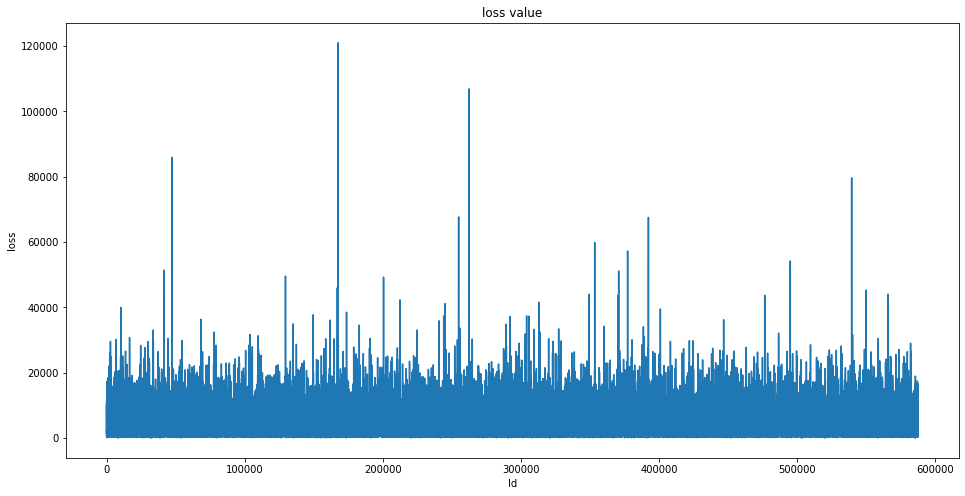

In [13]:
#plotting id vs loss to see distribution loss
plt.figure(figsize=(16,8))
plt.plot(train['id'],train['loss'])
plt.title('loss value')
plt.xlabel('Id');plt.ylabel('loss')


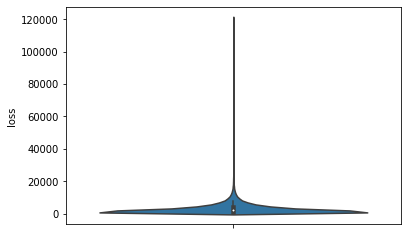

In [14]:
#checking distribution of loss in violinplot
sns.violinplot(data=train,y="loss") 

In [32]:
#checking skewness
from scipy import stats
stats.mstats.skew(train['loss'])

masked_array(data=3.79492815,
             mask=False,
       fill_value=1e+20)

skewed value greater than > 3.7 shows Right Skew

In [33]:
stats.mstats.skew(np.log(train['loss']))

masked_array(data=0.0929738,
             mask=False,
       fill_value=1e+20)

In [0]:
#Transforming loss through a log transformation
train['log_loss']=stats.mstats.skew(np.log(train['loss']))


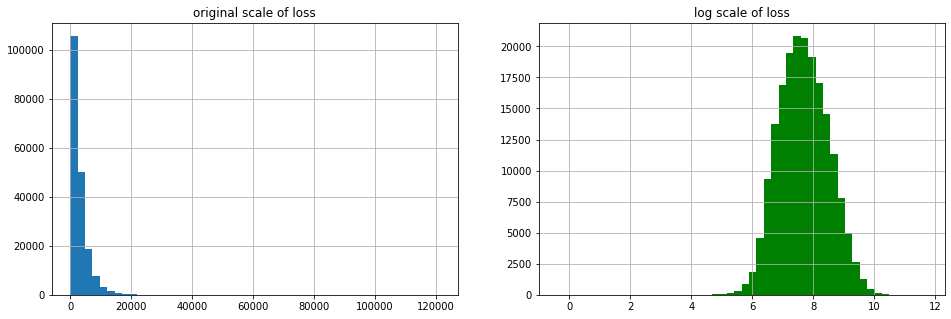

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(train['loss'],bins=50)
ax1.set_title('original scale of loss')
ax2.hist(np.log(train['loss']),bins=50,color='g')
ax2.set_title('log scale of loss')
ax1.grid(True)
ax2.grid(True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37e205d9b0>,
      dtype=object)

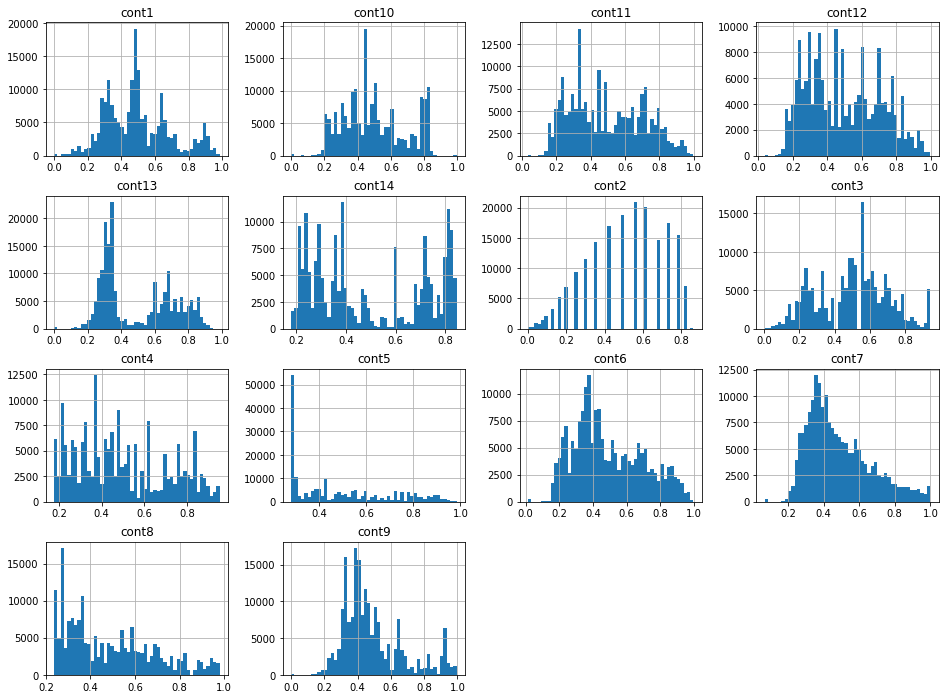

In [18]:
#checking the continous features in yhe dataset
train[cont_feature].hist(bins=50,figsize=(16,12))

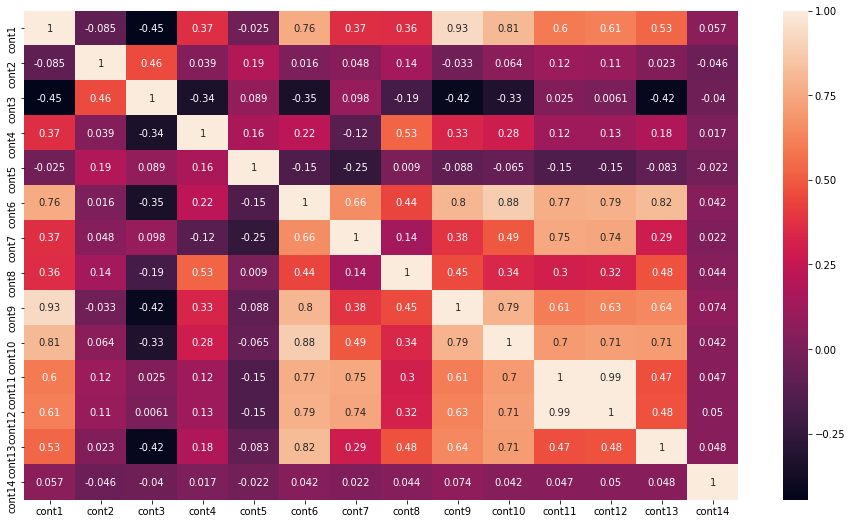

In [19]:
#checking correlation
plt.subplots(figsize=(16,9))
correlation_mat = train[cont_feature].corr()
sns.heatmap(correlation_mat,annot=True)

In [0]:
train['log_loss'] = np.log(train['loss'])

In [0]:
#deleting Highly correlated columns i.e, correlation > 0.85
train = train.drop(['cont9','cont10','cont11'],axis=1)

In [0]:
#defining a method to check the model performance
def xg_evaluation(yhat,dtrain):
    y = dtrain.get_label()
    return 'MAE', mean_absolute_error(np.exp(y),np.exp(yhat))

In [0]:
features = [x for x in train.columns if x not in ['id','loss','log_loss']]


In [0]:
#Encoding the features

ntrain = train.shape[0]
train_x = train[features]
train_y = train['log_loss']
for i in range(len(cat_feature)):
    train_x[cat_feature[i]] = train_x[cat_feature[i]].astype('category').cat.codes


In [0]:
#fitting XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold,train_test_split

dtrain = xgb.DMatrix(train_x,train['log_loss'])
xgb_parameter = {
    'seed':0,
    'eta':0.1,
    'colsample_bytree':0.5,
    'slient':1,
    'subsample':0.5,
    'objective':'reg:linear',
    'max_depth':5,
    'min_child_weight':3
}

In [43]:
# implementing cross-validation
bst_cv1 = xgb.cv(xgb_parameter,dtrain,num_boost_round=50,nfold=3,seed=0,feval=xg_evaluation,maximize=False,early_stopping_rounds=10)


[05:52:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:52:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [45]:
cv1.head()

,train-MAE-mean,train-MAE-std,train-rmse-mean,train-rmse-std,test-MAE-mean,test-MAE-std,test-rmse-mean,test-rmse-std
0,0.485529,5.551115e-17,0.366388,0.0,0.485529,5.551115e-17,0.366374,0.0
1,0.428592,5.551115e-17,0.329771,0.0,0.428592,5.551115e-17,0.329637,0.0
2,0.379101,5.551115e-17,0.296706,0.0,0.379101,5.551115e-17,0.296751,0.0
3,0.335933,0.000000e+00,0.267007,0.0,0.335933,0.000000e+00,0.267013,0.0
4,0.298162,0.000000e+00,0.240409,0.0,0.298162,0.000000e+00,0.240308,0.0


In [44]:
print('cv score',bst_cv1.iloc[-1:]['test-MAE-mean'])
#MAE = 1219.39

cv score 49    1219.3962
Name: test-MAE-mean, dtype: float64


<Figure size 432x288 with 0 Axes>

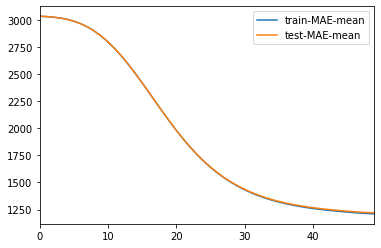

In [47]:

plt.figure()
bst_cv1[['train-MAE-mean','test-MAE-mean']].plot()
#not overfitting

In [48]:
#using 100 trees to estimate
bst_cv2 = xgb.cv(xgb_parameter,dtrain,num_boost_round=100,nfold=3,seed=0,feval=xg_evaluation,maximize=False,early_stopping_rounds=10)

[05:55:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:55:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [49]:
print('cv score',bst_cv2.iloc[-1:]['test-MAE-mean'])

cv score 99    1171.350179
Name: test-MAE-mean, dtype: float64


Text(0, 0.5, 'loss')

<Figure size 432x288 with 0 Axes>

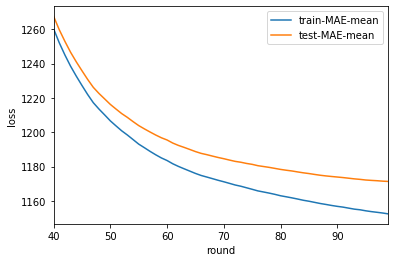

In [50]:

plt.figure()
ax = bst_cv2.iloc[40:][['train-MAE-mean','test-MAE-mean']].plot()
ax.set_xlabel('round')
ax.set_ylabel('loss')
#better results from cv1 but little overfitting

In [0]:
#choosing inital parameters
#changing max_depth and min_child_weight
#changing gamma to lower the overfitting
#changing subsample and colsample_bytree[change sampling strategy]
#changing learning rate eta

def mea_score(y_true,y_pred):
    return mean_absolute_error(np.exp(y_true),np.exp(y_pred))

#recalling inintial
xgb_parameter = {
    'seed':0,
    'eta':0.1,
    'colsample_bytree':0.5,
    'slient':1,
    'subsample':0.5,
    'objective':'reg:linear',
    'max_depth':5,
    'min_child_weight':3
}
#max_depth=8,min_child_weight=6 


In [0]:
#max_depth=8,min_child_weight=6 
xgb_parameter_v1 = {
    'seed':0,
    'eta':0.1,
    'colsample_bytree':0.5,
    'slient':1,
    'subsample':0.5,
    'objective':'reg:linear',
    'max_depth':8,
    'min_child_weight':6
}

In [56]:
bst_cv3 = xgb.cv(xgb_parameter_v1,dtrain,num_boost_round=50,nfold=3,seed=0,feval=xg_evaluation,maximize=False,early_stopping_rounds=10)

[06:02:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:02:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:02:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [57]:
print('cv score',bst_cv3.iloc[-1:]['test-MAE-mean'])

cv score 49    1188.788615
Name: test-MAE-mean, dtype: float64


In [0]:
#0.3 gamma fits the best
xgb_parameter_v2 = {
    'seed':0,
    'eta':0.1,
    'colsample_bytree':0.5,
    'slient':1,
    'subsample':0.5,
    'objective':'reg:linear',
    'max_depth':8,
    'min_child_weight':6,
    'gamma':0.3
}

In [59]:
bst_cv4 = xgb.cv(xgb_parameter_v2,dtrain,num_boost_round=50,nfold=3,seed=0,feval=xg_evaluation,maximize=False,early_stopping_rounds=10)

[06:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
print('cv score',bst_cv4.iloc[-1:]['test-MAE-mean'])

cv score 49    1188.719279
Name: test-MAE-mean, dtype: float64


In [0]:
#changing the colsample and subsample
#checking colsample =0.8 and subsample = 0.8

xgb_parameter_v3 = {
    'seed':0,
    'eta':0.1,
    'colsample_bytree':0.8,
    'slient':1,
    'subsample':0.8,
    'objective':'reg:linear',
    'max_depth':8,
    'min_child_weight':6,
    'gamma':0.3
}

In [62]:
bst_cv5 = xgb.cv(xgb_parameter_v3,dtrain,num_boost_round=50,nfold=3,seed=0,feval=xg_evaluation,maximize=False,early_stopping_rounds=10)

[06:06:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [63]:
print('cv score',bst_cv5.iloc[-1:]['test-MAE-mean'])

cv score 49    1183.673177
Name: test-MAE-mean, dtype: float64


In [0]:
#eta=0.07,and # of trees is 200
xgb_parameter_v4 = {
    'seed':0,
    'eta':0.07,
    'colsample_bytree':0.8,
    'slient':1,
    'subsample':0.8,
    'objective':'reg:linear',
    'max_depth':8,
    'min_child_weight':6,
    'gamma':0.3
}

In [65]:
bst_cv6 = xgb.cv(xgb_parameter_v4,dtrain,num_boost_round=200,nfold=3,seed=0,feval=xg_evaluation,maximize=False,early_stopping_rounds=10)

[06:08:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:08:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [66]:
print('cv score',bst_cv6.iloc[-1:]['test-MAE-mean'])

cv score 199    1148.662353
Name: test-MAE-mean, dtype: float64


In [0]:
#we have our final parameters

#seed':0,
#eta':0.07,
#'colsample_bytree':0.8,
#'subsample':0.8,
#'objective':'reg:linear
#max_depth':8,
#'min_child_weight':6,
#'gamma':0.3